# Programación Orientada a Objetos (Herencia)

In [60]:
import numpy as np
import matplotlib.pyplot as plt

In [61]:
class Objeto:
    def __init__(self, atributo1, atributo2):
        self.atributo1 = atributo1
        self.atributo2 = atributo2

    def metodo(self):
        print("Este es un metodo")

In [62]:
x = Objeto(1, 2)

In [63]:
x

In [64]:
x.atributo1

1

In [65]:
x.atributo2

2

In [66]:
x.metodo()

Este es un metodo


In [67]:
class Electrodomestico:
    def __init__(self, marca, estado = "apagado"):
        self.estado = estado
        self.marca = marca
        self.tipo = "El electrodomestico"
        self.verbo = "verbo"

    def encender(self):
        if self.estado == "apagado":
            print(f"{self.tipo} se encuentra apagado, se va a prender\n")
            self.estado = "prendido"
            print(f"Se prendió {self.tipo.lower()} {self.marca}")
        else:
            print(f"{self.tipo} {self.marca} ya se encontraba prendido")

    def apagar(self):
        if self.estado == "prendido":
            print(f"{self.tipo} se encuentra prendido, se va a apagar\n")
            self.estado = "apagado"
            print(f"Se apagó {self.tipo.lower()} {self.marca}")
        else:
            print(f"{self.tipo} {self.marca} ya se encontraba apagado")

    def funcion(self, segundos):
        if self.estado == "prendido":
            print(f"{self.tipo} {self.marca} va a {self.verbo} tu comida por {segundos} segundos")
        else:
            print(f"Enciende primero {self.tipo.lower()} {self.marca}")

In [68]:
class Microondas(Electrodomestico):
    def __init__(self, marca, estado = "apagado"):
        super().__init__(self)
        self.marca = marca
        self.estado = estado
        self.tipo = "El microondas"
        self.verbo = "calentar"

In [69]:
class Licuadora(Electrodomestico):
    def __init__(self, marca, estado = "apagado"):
        super().__init__(self)
        self.marca = marca
        self.estado = estado
        self.tipo = "La licuadora"
        self.verbo = "licuar"

In [70]:
x = Microondas("LG")
x

In [71]:
x.encender()

El microondas se encuentra apagado, se va a prender

Se prendió el microondas LG


In [72]:
x.apagar()

El microondas se encuentra prendido, se va a apagar

Se apagó el microondas LG


In [73]:
x.apagar()

El microondas LG ya se encontraba apagado


In [74]:
x.encender()

El microondas se encuentra apagado, se va a prender

Se prendió el microondas LG


In [75]:
x.encender()

El microondas LG ya se encontraba prendido


In [76]:
x.funcion(20)

El microondas LG va a calentar tu comida por 20 segundos


In [77]:
x = Licuadora("LG")
x

In [78]:
x.encender()

La licuadora se encuentra apagado, se va a prender

Se prendió la licuadora LG


In [79]:
x.funcion(20)

La licuadora LG va a licuar tu comida por 20 segundos


In [80]:
class simulacion:
    def __init__(self, t0, tf, x0, v0, n, fuerza = lambda x, i: 0, inicializado = False):
        self.t0 = t0
        self.tf = tf
        self.x0 = x0
        self.v0 = v0
        self.n = n
        self.fuerza = fuerza
        self.inicializado = inicializado

        self.desplazamiento = np.zeros(self.n + 1)
        self.velocidad = np.zeros(self.n + 1)

        self.tiempo, self.paso_tiempo = np.linspace(self.t0, self.tf, self.n + 1, retstep = True)

    def inicializacion(self):
        if self.inicializado:
            print("La simulación ya está inicializada")
        else:
            self.inicializado = True
            self.desplazamiento[0] = self.x0
            self.velocidad[0] = self.v0
            print(f"Se inicializó la simulación con los valores x0 = {self.x0} y v0 = {self.v0}")

    def graficar_desplazamiento(self):
        plt.figure(figsize = (8, 5))
        plt.plot(self.tiempo, self.desplazamiento)
        plt.xlabel("Tiempo")
        plt.ylabel("Desplazamiento")
        plt.show()

    def graficar_velocidad(self):
        plt.figure(figsize = (8, 5))
        plt.plot(self.tiempo, self.velocidad)
        plt.xlabel("Tiempo")
        plt.ylabel("Velocidad")
        plt.show()

    def tecnica(self):
        pass
  
    def proceso(self):
        print("Se va a realizar el proceso de simulación")
        print()

        self.inicializacion()
        self.tecnica()
        self.graficar_desplazamiento()
        self.graficar_velocidad()

        print()
        print("Se terminó el proceso de simulación")


In [81]:
class Euler(simulacion):
    def __init__(self, t0, tf, x0, v0, n, fuerza = lambda x, v, i : 0, inicializado = False):
        super().__init__(t0, tf, x0, v0, n, fuerza = lambda x, v, i : 0, inicializado = False)
        self.t0 = t0
        self.tf = tf
        self.x0 = x0
        self.v0 = v0
        self.n = n
        self.fuerza = fuerza
        self.inicializado = inicializado

        self.desplazamiento = np.zeros(self.n + 1)
        self.velocidad = np.zeros(self.n + 1)

        self.tiempo, self.paso_tiempo = np.linspace(self.t0, self.tf, self.n + 1, retstep = True)

    def tecnica(self):
        if self.inicializado:
            for i in range(1, self.n + 1):
                self.velocidad[i] = self.velocidad[i - 1] + self.paso_tiempo * self.fuerza(self.desplazamiento, self.velocidad, i)
                self.desplazamiento[i] = self.desplazamiento[i - 1] + self.paso_tiempo * self.velocidad[i]

        else:
            print("Primero inicializa la simulación")
    
    def __str__(self):
        return f"Esta es una simulación por el método de Euler, inicializada : {self.inicializado}"

In [82]:
class RungeKutta(simulacion):
    def __init__(self, t0, tf, x0, v0, n, fuerza = lambda x, v, i : 0, inicializado = False):
        super().__init__(t0, tf, x0, v0, n, fuerza = lambda x, v, i : 0, inicializado = False)
        self.t0 = t0
        self.tf = tf
        self.x0 = x0
        self.v0 = v0
        self.n = n
        self.fuerza = fuerza
        self.inicializado = inicializado

        self.desplazamiento = np.zeros(self.n + 1)
        self.velocidad = np.zeros(self.n + 1)

        self.tiempo, self.paso_tiempo = np.linspace(self.t0, self.tf, self.n + 1, retstep = True)

    def tecnica(self):
        if self.inicializado:
            for i in range(1, self.n + 1):
                k1 = self.fuerza(self.desplazamiento, self.velocidad, i - 1)
                k2 = self.fuerza(self.desplazamiento, self.velocidad + k1 / 2, i - 1)
                k3 = self.fuerza(self.desplazamiento, self.velocidad + k2 / 2, i - 1)
                k4 = self.fuerza(self.desplazamiento, self.velocidad + k3, i - 1)
                self.velocidad[i] = self.velocidad[i - 1] + (self.paso_tiempo * (k1 + 2 * k2 + 2 * k3 + k4)) / 6
                self.desplazamiento[i] = self.desplazamiento[i - 1] + self.paso_tiempo * self.velocidad[i]

        else:
            print("Primero inicializa la simulación")

    def __str__(self):
        return f"Esta es una simulación por el método de Runge-Kutta, inicializada : {self.inicializado}"

In [83]:
x = Euler(0, 10, 0, 1, 10000)
print(x)

Esta es una simulación por el método de Euler, inicializada : False


In [84]:
x.inicializacion()

Se inicializó la simulación con los valores x0 = 0 y v0 = 1


In [85]:
x.velocidad

array([1., 0., 0., ..., 0., 0., 0.], shape=(10001,))

Se va a realizar el proceso de simulación

La simulación ya está inicializada


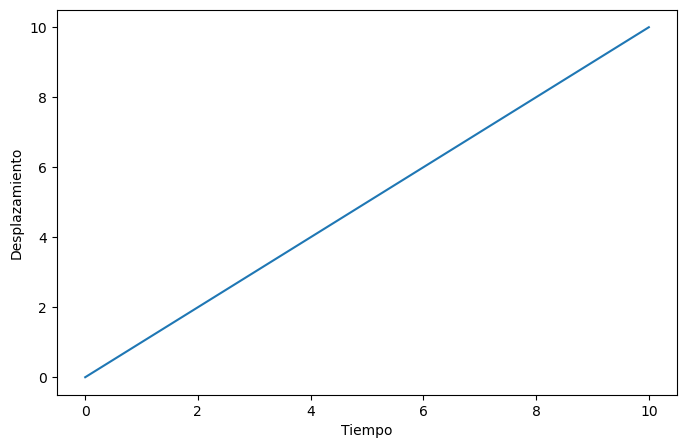

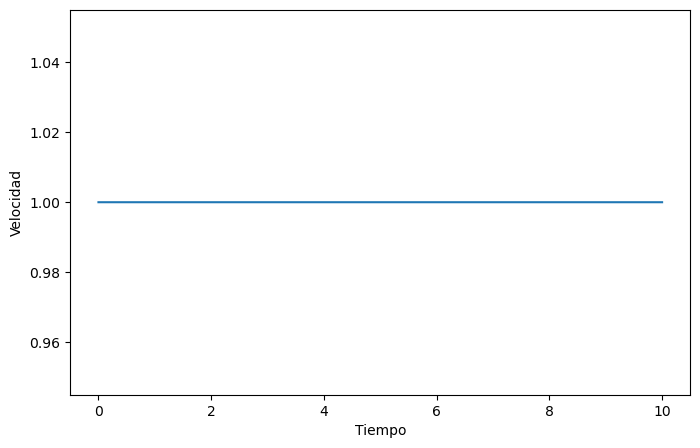


Se terminó el proceso de simulación


In [86]:
x.proceso()

In [87]:
fuerza = lambda x, v, i : -x[i - 1] if i <= 3000 else - x[i - 1] - v[i - 1]
x = RungeKutta(0, 100, 0, 1, 20000, fuerza = fuerza )
print(x)

Esta es una simulación por el método de Runge-Kutta, inicializada : False


Se va a realizar el proceso de simulación

Se inicializó la simulación con los valores x0 = 0 y v0 = 1


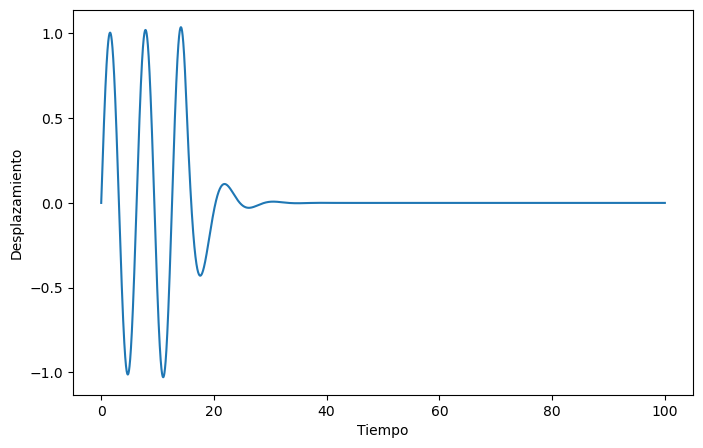

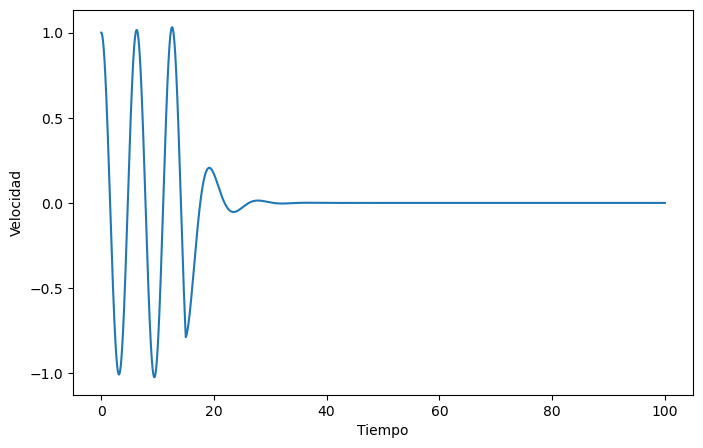


Se terminó el proceso de simulación


In [88]:
x.proceso()